<a href="https://colab.research.google.com/github/girisiman/Deep_Learning_Tasks/blob/master/DL_Task_2_Final_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import keras.datasets.mnist as fashion_mnist
import keras
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from keras import regularizers
from keras.layers import Input
from keras.models import Model
from keras.layers import Layer
from keras.layers.core import Dense, Dropout
from keras.utils import np_utils
from keras.models import Sequential
from keras import optimizers
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import  KerasClassifier
import os
from sklearn.metrics import accuracy_score


Using TensorFlow backend.


In [0]:
Result1 = {'mlp_accu': [], 'rf_accu':[], 'cnn_acu':[]}
Result2 = {'ae_mle_acc':[],'ae_rf_accu':[]}

In [0]:
# function to build basic mlp:
def mlp_model(layers,activation, optimizer,drop_out, num_classes=10):
  ''' Build a simple mlp model for multi-class classification;  
      Arguments:all the hyperparametes (layers,act,opt, drop_out) to buld in a mlp provided by dictionary of parameters used during hyperparameter
      optimization
           '''
  model = Sequential()
  for i in range(len(layers)):
    if i == 0:
        model.add(Dense(layers[i], activation=activation, input_shape=(784,)))
        model.add(Dropout(drop_out))
    else:
      model.add(Dense(layers[i], activation=activation))
      model.add(Dropout(drop_out))
  model.add(Dense(num_classes, activation=activation))
  model.summary()

  model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

  return model

In [7]:
from keras import backend
print(backend.image_data_format())

channels_last


In [8]:

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape, 'train samples')
print(x_test.shape[0], 'test samples')
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test,10)
y_train.shape

11493376/11490434 [==============================] - 1s 0us/step
(60000, 784) train samples
10000 test samples


(60000, 10)

In [9]:
model = KerasClassifier(build_fn=mlp_model, epochs=10, batch_size=128, verbose=0)
parameter = {'layers':[[512,512],[512,512,512]],'activation': [ 'relu',],
             'optimizer': [ 'Adam' ],
             'drop_out': [ 0.5]}
classifier = GridSearchCV(estimator=model, param_grid=parameter)
search_result = classifier.fit(x_train, y_train)
#print("Best Accuracy: %f using %s" % (search_result.best_score_, search_result.best_params_))


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)          

In [10]:
Result1 = {'mlp_accu': [], 'rf_accu':[], 'cnn_acu':[]}
best_estimator = classifier.best_estimator_
best_model = classifier.best_estimator_.model
metric_names_mlp = best_model.metrics_names
metric_values_mlp = best_model.evaluate(x_test, y_test)
#Result1.update(mlp_accu = metric_values_mlp[1])
for metric, value in zip(metric_names_mlp, metric_values_mlp):
    print(metric, ': ', value)



10000/10000 [==============================] - 1s 66us/step
loss :  0.3236925237879157
acc :  0.9371


In [0]:
Result1.update(mlp_accu = metric_values_mlp[1]*100)

In [12]:
model_rfc = RandomForestClassifier(n_estimators=64, n_jobs=-1)
model_rfc.fit(x_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=64, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [0]:
rfc_accuracy = model_rfc.score(x_test,y_test)*100
rfc_accuracy
Result1.update(rf_accu=rfc_accuracy)


##CNN

In [14]:
#preparing data for CNN:
from keras import backend as K
image_rows, image_cols = 28, 28
num_classes = 10
(x_train_cnn, y_train_cnn), (x_test_cnn, y_test_cnn) = fashion_mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train_cnn = x_train_cnn.reshape(x_train_cnn.shape[0], 1, image_rows, image_cols)
    x_test_cnn = x_test_cnn.reshape(x_test_cnn.shape[0], 1, image_rows, image_cols)
    input_shape = (1, image_rows, image_cols)
else:
    x_train_cnn = x_train_cnn.reshape(x_train_cnn.shape[0], image_rows, image_cols, 1)
    x_test_cnn = x_test_cnn.reshape(x_test_cnn.shape[0], image_rows, image_cols, 1)
    input_shape = (image_rows, image_cols, 1)

x_train_cnn = x_train_cnn.astype('float32')
x_test_cnn = x_test_cnn.astype('float32')
x_train_cnn /= 255
x_test_cnn /= 255

# convert class vectors to binary class matrices
y_train_cnn = keras.utils.to_categorical(y_train_cnn, num_classes)
y_test_cnn = keras.utils.to_categorical(y_test_cnn, num_classes)
print(x_train_cnn.shape)
print(y_train_cnn.shape)

(60000, 28, 28, 1)
(60000, 10)


In [0]:
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D



def cnn_model(dense_layer_sizes, filters, kernel_size, pool_size):
  model = Sequential()
  model.add(Conv2D(filters, kernel_size,
                     padding='valid',
                     input_shape=input_shape))
  model.add(Activation('relu'))
  model.add(Conv2D(filters, kernel_size))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=pool_size))
  model.add(Dropout(0.25))

  model.add(Flatten())
  for layer_size in dense_layer_sizes:
        model.add(Dense(layer_size))
        model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))
  
  opt = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
  model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])

  return model
  

In [16]:
param = {'dense_layer_sizes': [[512],[512,512]],  'filters':[8], 'kernel_size': [3], 'pool_size':[2]}
my_classifier = KerasClassifier(cnn_model,epochs = 15, batch_size=126)
validator = GridSearchCV(my_classifier,
                         param_grid=param,
                         scoring ='neg_log_loss',
                         n_jobs=1)
search_result = validator.fit(x_train_cnn, y_train_cnn)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/15
40000/40000 [==============================] - 5s 126us/step - loss: 0.3268 - acc: 0.8982
Epoch 2/15
40000/40000 [==============================] - 2s 39us/step - loss: 0.1206 - acc: 0.9624
Epoch 3/15
40000/40000 [==============================] - 2s 39us/step - loss: 0.0926 - acc: 0.9713
Epoch 4/15
40000/40000 [==============================] - 2s 38us/step - loss: 0.0844 - acc: 0.9737
Epoch 5/15
40000/40000 [==============================] - 2s 38us/step - loss: 0.0785 - acc: 0.9756
Epoch 6/15
40000/40000 [==============================] - 2s 39us/step - loss: 0.0645 - acc: 0.9801
Epoch 7/15
40000/40000 [==============================] - 2s 39us/step - loss: 0.0660 - acc: 0.9795
Epoch 8/15
40000/40000 [==============================] - 2s 39us/step - loss: 0.0620 - acc: 0.9809
Epoch 9/15
40000/40000 [==============================] - 2s 39us/step - loss: 0.0586 - acc: 0.9817
Epoch 10/15
40000/40000 [==============================] - 2s 39us/step - loss: 0.0526 - acc: 0.983

In [17]:
best_model_cnn = validator.best_estimator_.model
metric_names_cnn = best_model_cnn.metrics_names
metric_values_cnn = best_model_cnn.evaluate(x_test_cnn, y_test_cnn)
for metric, value in zip(metric_names_cnn, metric_values_cnn):
    print(metric, ': ', value)
    

10000/10000 [==============================] - 1s 96us/step
loss :  0.03398493984423076
acc :  0.9897


In [50]:
Result1.update(cnn_acu = metric_values_cnn[1]*100)
Result1

{'cnn_acu': 98.97, 'mlp_accu': 0.9371, 'rf_accu': 90.06}

### AutoEncoder to Find Best Learning rate

In [19]:
from keras.datasets import fashion_mnist
import numpy as np

(x_train_ae,_), (x_test_ae, _) = fashion_mnist.load_data()

x_train_ae = x_train_ae.astype('float32') / 255.
x_test_ae = x_test_ae.astype('float32') / 255.
x_train_ae = np.reshape(x_train_ae, (len(x_train_ae), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test_ae = np.reshape(x_test_ae, (len(x_test_ae), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_train_ae.shape
#y_train = keras.utils.to_categorical(y_train, 10)

4423680/4422102 [==============================] - 1s 0us/step


(60000, 28, 28, 1)

In [0]:
def cnn_autoencoder(lr=0.01):
  from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
  from keras.models import Model
  from keras import backend as K

  input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

  x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
  x = MaxPooling2D((2, 2), padding='same')(x)
  x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
  x = MaxPooling2D((2, 2), padding='same')(x)
  x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
  encoded = MaxPooling2D((2, 2), padding='same')(x)

  # at this point the representation is (4, 4, 8) i.e. 128-dimensional

  x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
  x = UpSampling2D((2, 2))(x)
  x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
  x = UpSampling2D((2, 2))(x)
  x = Conv2D(16, (3, 3), activation='relu')(x)
  x = UpSampling2D((2, 2))(x)
  decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

  autoencoder = Model(input_img, decoded)
  autoencoder.compile(optimizer = keras.optimizers.Adadelta(lr=lr),loss = 'binary_crossentropy')
  
  return autoencoder

In [21]:
ae = cnn_autoencoder()
parameter = { 'lr': [0.001,0.1]}
comb = ParameterGrid(parameter)
print(comb)
analysis = []
for param in ParameterGrid(parameter):
  print(param)
  
  #history = {}
  history = ae.fit(x_train_ae,x_train_ae, epochs=5, batch_size = 126,shuffle = True ,validation_data = (x_test_ae,x_test_ae))
  
  print(min(history.history['loss']))
  print(min(history.history['val_loss']))
  
  
  
  


{'lr': 0.001}
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 85us/step - loss: 0.6831 - val_loss: 0.6574
Epoch 2/5
60000/60000 [==============================] - 4s 60us/step - loss: 0.5885 - val_loss: 0.4862
Epoch 3/5
60000/60000 [==============================] - 4s 60us/step - loss: 0.4329 - val_loss: 0.3948
Epoch 4/5
60000/60000 [==============================] - 4s 60us/step - loss: 0.3786 - val_loss: 0.3721
Epoch 5/5
60000/60000 [==============================] - 4s 62us/step - loss: 0.3656 - val_loss: 0.3638
0.36563389434814453
0.36377939326763153
{'lr': 0.1}
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 62us/step - loss: 0.3589 - val_loss: 0.3585
Epoch 2/5
60000/60000 [==============================] - 4s 62us/step - loss: 0.3544 - val_loss: 0.3544
Epoch 3/5
60000/60000 [==============================] - 4s 60us/step - loss: 0.3508 - val_loss: 0.3512
Ep

The loss for lr 0.1 is low so we trained auotencoder with learning rate of 0.1

In [0]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img_ae = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img_ae)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)
encoder = Model(input_img_ae, encoded)

  # at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img_ae, decoded)
autoencoder.compile(optimizer = keras.optimizers.Adadelta(lr=0.1),loss = 'binary_crossentropy', metrics=['accuracy'])

  
  

In [23]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=2, random_state=None, shuffle=False)
val_score = []
  
for train_index,  test_index in kf.split(x_train_ae):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train,X_test = x_train_ae[train_index],x_train_ae[test_index] 
  #val_score = []
  
  history = autoencoder.fit(X_train,X_train, epochs = 10,batch_size = 126, shuffle = True, validation_data = (X_test,X_test) )
  score = autoencoder.evaluate(x_train_ae,x_train_ae)
  val_score.append((score,autoencoder))
  
  
  


TRAIN: [30000 30001 30002 ... 59997 59998 59999] TEST: [    0     1     2 ... 29997 29998 29999]
Train on 30000 samples, validate on 30000 samples
Epoch 1/10
30000/30000 [==============================] - 4s 133us/step - loss: 0.5215 - acc: 0.4869 - val_loss: 0.3829 - val_acc: 0.4909
Epoch 2/10
30000/30000 [==============================] - 2s 77us/step - loss: 0.3675 - acc: 0.4962 - val_loss: 0.3539 - val_acc: 0.4969
Epoch 3/10
30000/30000 [==============================] - 2s 77us/step - loss: 0.3513 - acc: 0.4977 - val_loss: 0.3452 - val_acc: 0.5000
Epoch 4/10
30000/30000 [==============================] - 2s 77us/step - loss: 0.3445 - acc: 0.4985 - val_loss: 0.3408 - val_acc: 0.4971
Epoch 5/10
30000/30000 [==============================] - 2s 77us/step - loss: 0.3391 - acc: 0.4992 - val_loss: 0.3352 - val_acc: 0.4986
Epoch 6/10
30000/30000 [==============================] - 2s 77us/step - loss: 0.3341 - acc: 0.4999 - val_loss: 0.3304 - val_acc: 0.5007
Epoch 7/10
30000/30000 [======

In [24]:
val_score

sorted_val_score = sorted(val_score, key = lambda a:(a[0]), reverse = True)
autoencoder = sorted_val_score[0].__getitem__(1)
autoencoder

In [25]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 4, 4, 8)           0         
__________

In [26]:

encoder_train  = Model(autoencoder.input, autoencoder.layers[-8].output)

encoder_train.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 4, 4, 8)           0         
Total para

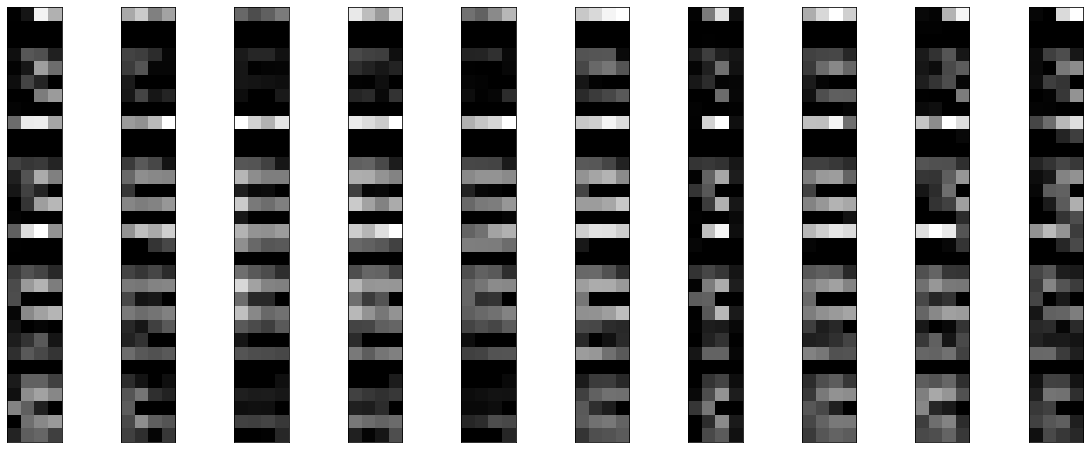

In [115]:
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoder_train_image[i].reshape(4, 4 * 8).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
# function to build basic mlp:
def mlp_model3(layers,activation, optimizer,drop_out, num_classes=10):
  ''' Build a simple mlp model for multi-class classification;  
      Arguments:all the hyperparametes (layers,act,opt, drop_out) to buld in a mlp provided by dictionary of parameters used during hyperparameter
      optimization
      
           '''
  from keras.layers import InputLayer
  model = Sequential()
  for i in range(len(layers)):
    if i == 0:
        model.add(InputLayer( input_shape=(128,)))
        #model.add(Dense(layers[i], activation=activation, input_shape=(32,4,)))
        #model.add(Dropout(drop_out))
    else:
      model.add(Dense(layers[i], activation=activation))
      model.add(Dropout(drop_out))
  model.add(Dense(num_classes, activation=activation))
  model.summary()

  model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

  return model

In [46]:
(x_train_mae, y_train_mae), (x_test_mae, y_test_mae) = fashion_mnist.load_data()
x_train_mae = x_train_mae.reshape(60000, 784)
x_test_mae = x_test_mae.reshape(10000, 784)
x_train_mae = x_train_mae.astype('float32')
x_test_mae = x_test_mae.astype('float32')
x_train_mae /= 255
x_test_mae /= 255
print(x_train_mae.shape, 'train samples')
print(x_test_mae.shape[0], 'test samples')
y_train_mae = keras.utils.to_categorical(y_train_mae, 10)
y_label = keras.utils.to_categorical(y_test_mae,10)
#y_train.shape

(60000, 784) train samples
10000 test samples


In [0]:
x_train_3 = x_train_mae.reshape(60000, 28,28,1)
x_test_3 = x_test_mae.reshape(10000,28,28,1)

In [0]:
encoder_train_image = encoder_train.predict(x_train_3)
encoder_test_image = encoder_train.predict(x_test_3)


In [36]:
model3 = KerasClassifier(build_fn=mlp_model3, epochs=30, batch_size=256, verbose=1)
print(y_train.shape)
print(x_train_3.shape)

parameter = {'layers':[[512,512],[512,512,512]],'activation': [ 'relu',],
             'optimizer': [ 'Adam' ],
             'drop_out': [ 0.1]}
classifier3 = GridSearchCV(estimator=model3, param_grid=parameter,verbose = 1)
search_result3 = classifier3.fit(encoder_train_image.reshape(60000,128), y_train_mae)

(60000, 10)
(60000, 28, 28, 1)
Fitting 3 folds for each of 2 candidates, totalling 6 fits
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 512)               66048     
_________________________________________________________________
dropout_44 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_62 (Dense)             (None, 10)                5130      
Total params: 71,178
Trainable params: 71,178
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/30
40000/40000 [==============================] - 2s 57us/step - loss: 2.8813 - acc: 0.4850
Epoch 2/30
40000/40000 [==============================] - 1s 14us/step - loss: 2.9197 - acc: 0.3339
Epoch 3/30
40000/40000 [==============================] - 1s 14us/step - loss: 2.7601 - acc: 0.4440
Epoch 4/30
40000/40000 [==============================] - 1s 14us/step - loss: 2.9479 - acc: 0.2461
Epoch 5/30
40000/40000 [==============================] - 1s 14us/step - loss: 2.6500 - acc: 0.5283
Epoch 6/30
40000/40000 [==============================] - 1s 14us/step - loss: 2.9540 - acc: 0.2751
Epoch 7/30
40000/40000 [==============================] - 1s 14us/step - loss: 3.1235 - acc: 0.1441
Epoch 8/30
40000/40000 [==============================] - 1s 14us/step - loss: 2.9365 - acc: 0.2575
Epoch 9/30
40000/40000 [==============================] - 1s 14us/step - loss: 2.7265 - acc: 0.4703
Epoch 10/30
40000/40000 [==============================] - 1s 14us/step - loss: 2.6742 - acc: 0.4901

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  2.1min finished


Epoch 1/30
60000/60000 [==============================] - 3s 48us/step - loss: 2.8553 - acc: 0.4842
Epoch 2/30
60000/60000 [==============================] - 1s 14us/step - loss: 2.8246 - acc: 0.3922
Epoch 3/30
60000/60000 [==============================] - 1s 14us/step - loss: 2.7419 - acc: 0.4188
Epoch 4/30
60000/60000 [==============================] - 1s 14us/step - loss: 2.6953 - acc: 0.4262
Epoch 5/30
60000/60000 [==============================] - 1s 14us/step - loss: 2.6571 - acc: 0.4600
Epoch 6/30
60000/60000 [==============================] - 1s 14us/step - loss: 2.4804 - acc: 0.6432
Epoch 7/30
60000/60000 [==============================] - 1s 14us/step - loss: 2.7502 - acc: 0.3782
Epoch 8/30
60000/60000 [==============================] - 1s 14us/step - loss: 2.5144 - acc: 0.5917
Epoch 9/30
60000/60000 [==============================] - 1s 14us/step - loss: 2.8541 - acc: 0.2811
Epoch 10/30
60000/60000 [==============================] - 1s 14us/step - loss: 2.5215 - acc: 0.5758

In [38]:
print("Best Accuracy: %f using %s" % (search_result3.best_score_, search_result3.best_params_))
best_estimator_mlp_ae = classifier3.best_estimator_
y_pred = best_estimator_mlp_ae.predict(encoder_test_image.reshape(10000,128))
accuracy = (accuracy_score(y_test_mae,y_pred)*100)
#print(accuracy)

Result2 = {'ae_mle_acc':[],'ae_rf_accu':[]}
Result2.update(ae_mle_acc= accuracy)

Best Accuracy: 0.527683 using {'activation': 'relu', 'drop_out': 0.1, 'layers': [512, 512], 'optimizer': 'Adam'}
10000/10000 [==============================] - 0s 6us/step


In [42]:
model_rfc = RandomForestClassifier(n_estimators=64, n_jobs=-1)
model_rfc.fit(encoder_train_image.reshape(60000,128), y_train_mae)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=64, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [47]:
rfc_accuracy_ae = model_rfc.score(encoder_test_image.reshape(10000,128),y_label)*100
print(rfc_accuracy_ae)
Result2.update(ae_rf_accu=rfc_accuracy_ae)

76.99000000000001


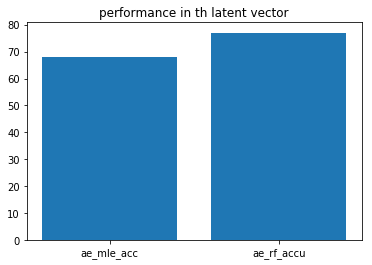

In [48]:
import matplotlib.pyplot as plt



plt.bar(range(len(Result2)), list(Result2.values()), align='center')
plt.xticks(range(len(Result2)), list(Result2.keys()))
plt.title('performance in th latent vector')
plt.show()

{'ae_mle_acc': 67.93, 'ae_rf_accu': 76.99000000000001}
{'mlp_accu': 93.71000000000001, 'rf_accu': 90.06, 'cnn_acu': 98.97}


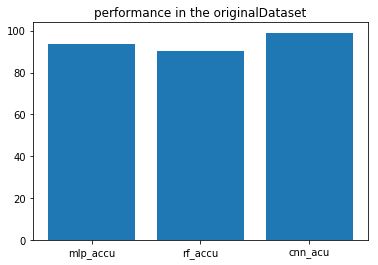

In [52]:
import matplotlib.pyplot as plt
print(Result2)
print(Result1)

#D = {u'Label1':26, u'Label2': 17, u'Label3':30}


plt.bar(range(len(Result1)), list(Result1.values()), align='center')
plt.xticks(range(len(Result1)), list(Result1.keys()))
plt.title('performance in the originalDataset')
plt.show()